<a href="https://colab.research.google.com/github/MacWorldPro/Module_34/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('diabetes.csv')

# EDA to know more about data

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# All columns are numerical only.

In [34]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.855469,120.894531,69.089844,20.536458,97.022135,32.106250,0.504982,33.369792,0.348958
std,3.405831,31.972618,19.886143,15.952218,178.894223,8.286105,0.451758,12.206127,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [35]:
# Let us replace 0 values except from pregnancies
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())



In [36]:
# Let's check for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# No Null values

In [37]:
# Checking which columns follows normal distribution
df.skew()

Pregnancies                 0.974733
Glucose                     0.533225
BloodPressure               0.604063
SkinThickness               1.226670
Insulin                     3.826956
BMI                         1.153480
DiabetesPedigreeFunction    2.884736
Age                         1.348477
Outcome                     0.635017
dtype: float64

In [38]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [39]:
# Let us remove the skewness of the skewed columns


# Positive one indicates right skew and negative ones left skew , their values states the extent of skweness.

# From this we can get that none of the values follows normal distribution.

<Axes: >

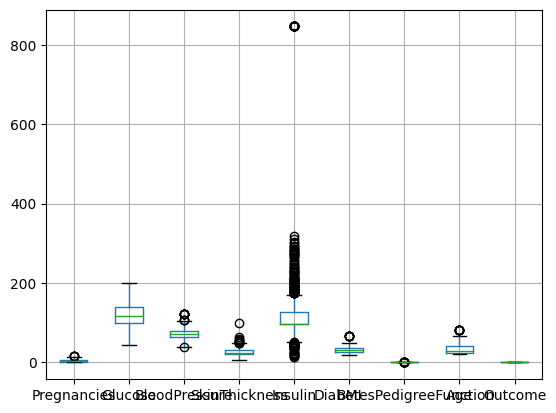

In [40]:
# Let check for the outliers of the columns
df.boxplot()

# So we can see that every column contains outliers except outcome.

In [41]:
# Let check for the relation between the columns
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128156,0.198622,0.013876,0.009623,0.018124,-0.029927,0.523402,0.223716
Glucose,0.128156,1.000000,0.213006,0.160766,0.348726,0.225066,0.119775,0.258884,0.492908
BloodPressure,0.198622,0.213006,1.000000,0.144799,0.000369,0.306226,0.001228,0.317428,0.166531
SkinThickness,0.013876,0.160766,0.144799,1.000000,0.187241,0.518836,0.122534,0.018484,0.175026
Insulin,0.009623,0.348726,0.000369,0.187241,1.000000,0.139057,0.073805,0.035983,0.150960
BMI,0.018124,0.225066,0.306226,0.518836,0.139057,1.000000,0.117614,0.011363,0.305014
DiabetesPedigreeFunction,-0.029927,0.119775,0.001228,0.122534,0.073805,0.117614,1.000000,0.033268,0.167726
Age,0.523402,0.258884,0.317428,0.018484,0.035983,0.011363,0.033268,1.000000,0.227511
Outcome,0.223716,0.492908,0.166531,0.175026,0.150960,0.305014,0.167726,0.227511,1.000000


In [42]:
import seaborn as sns

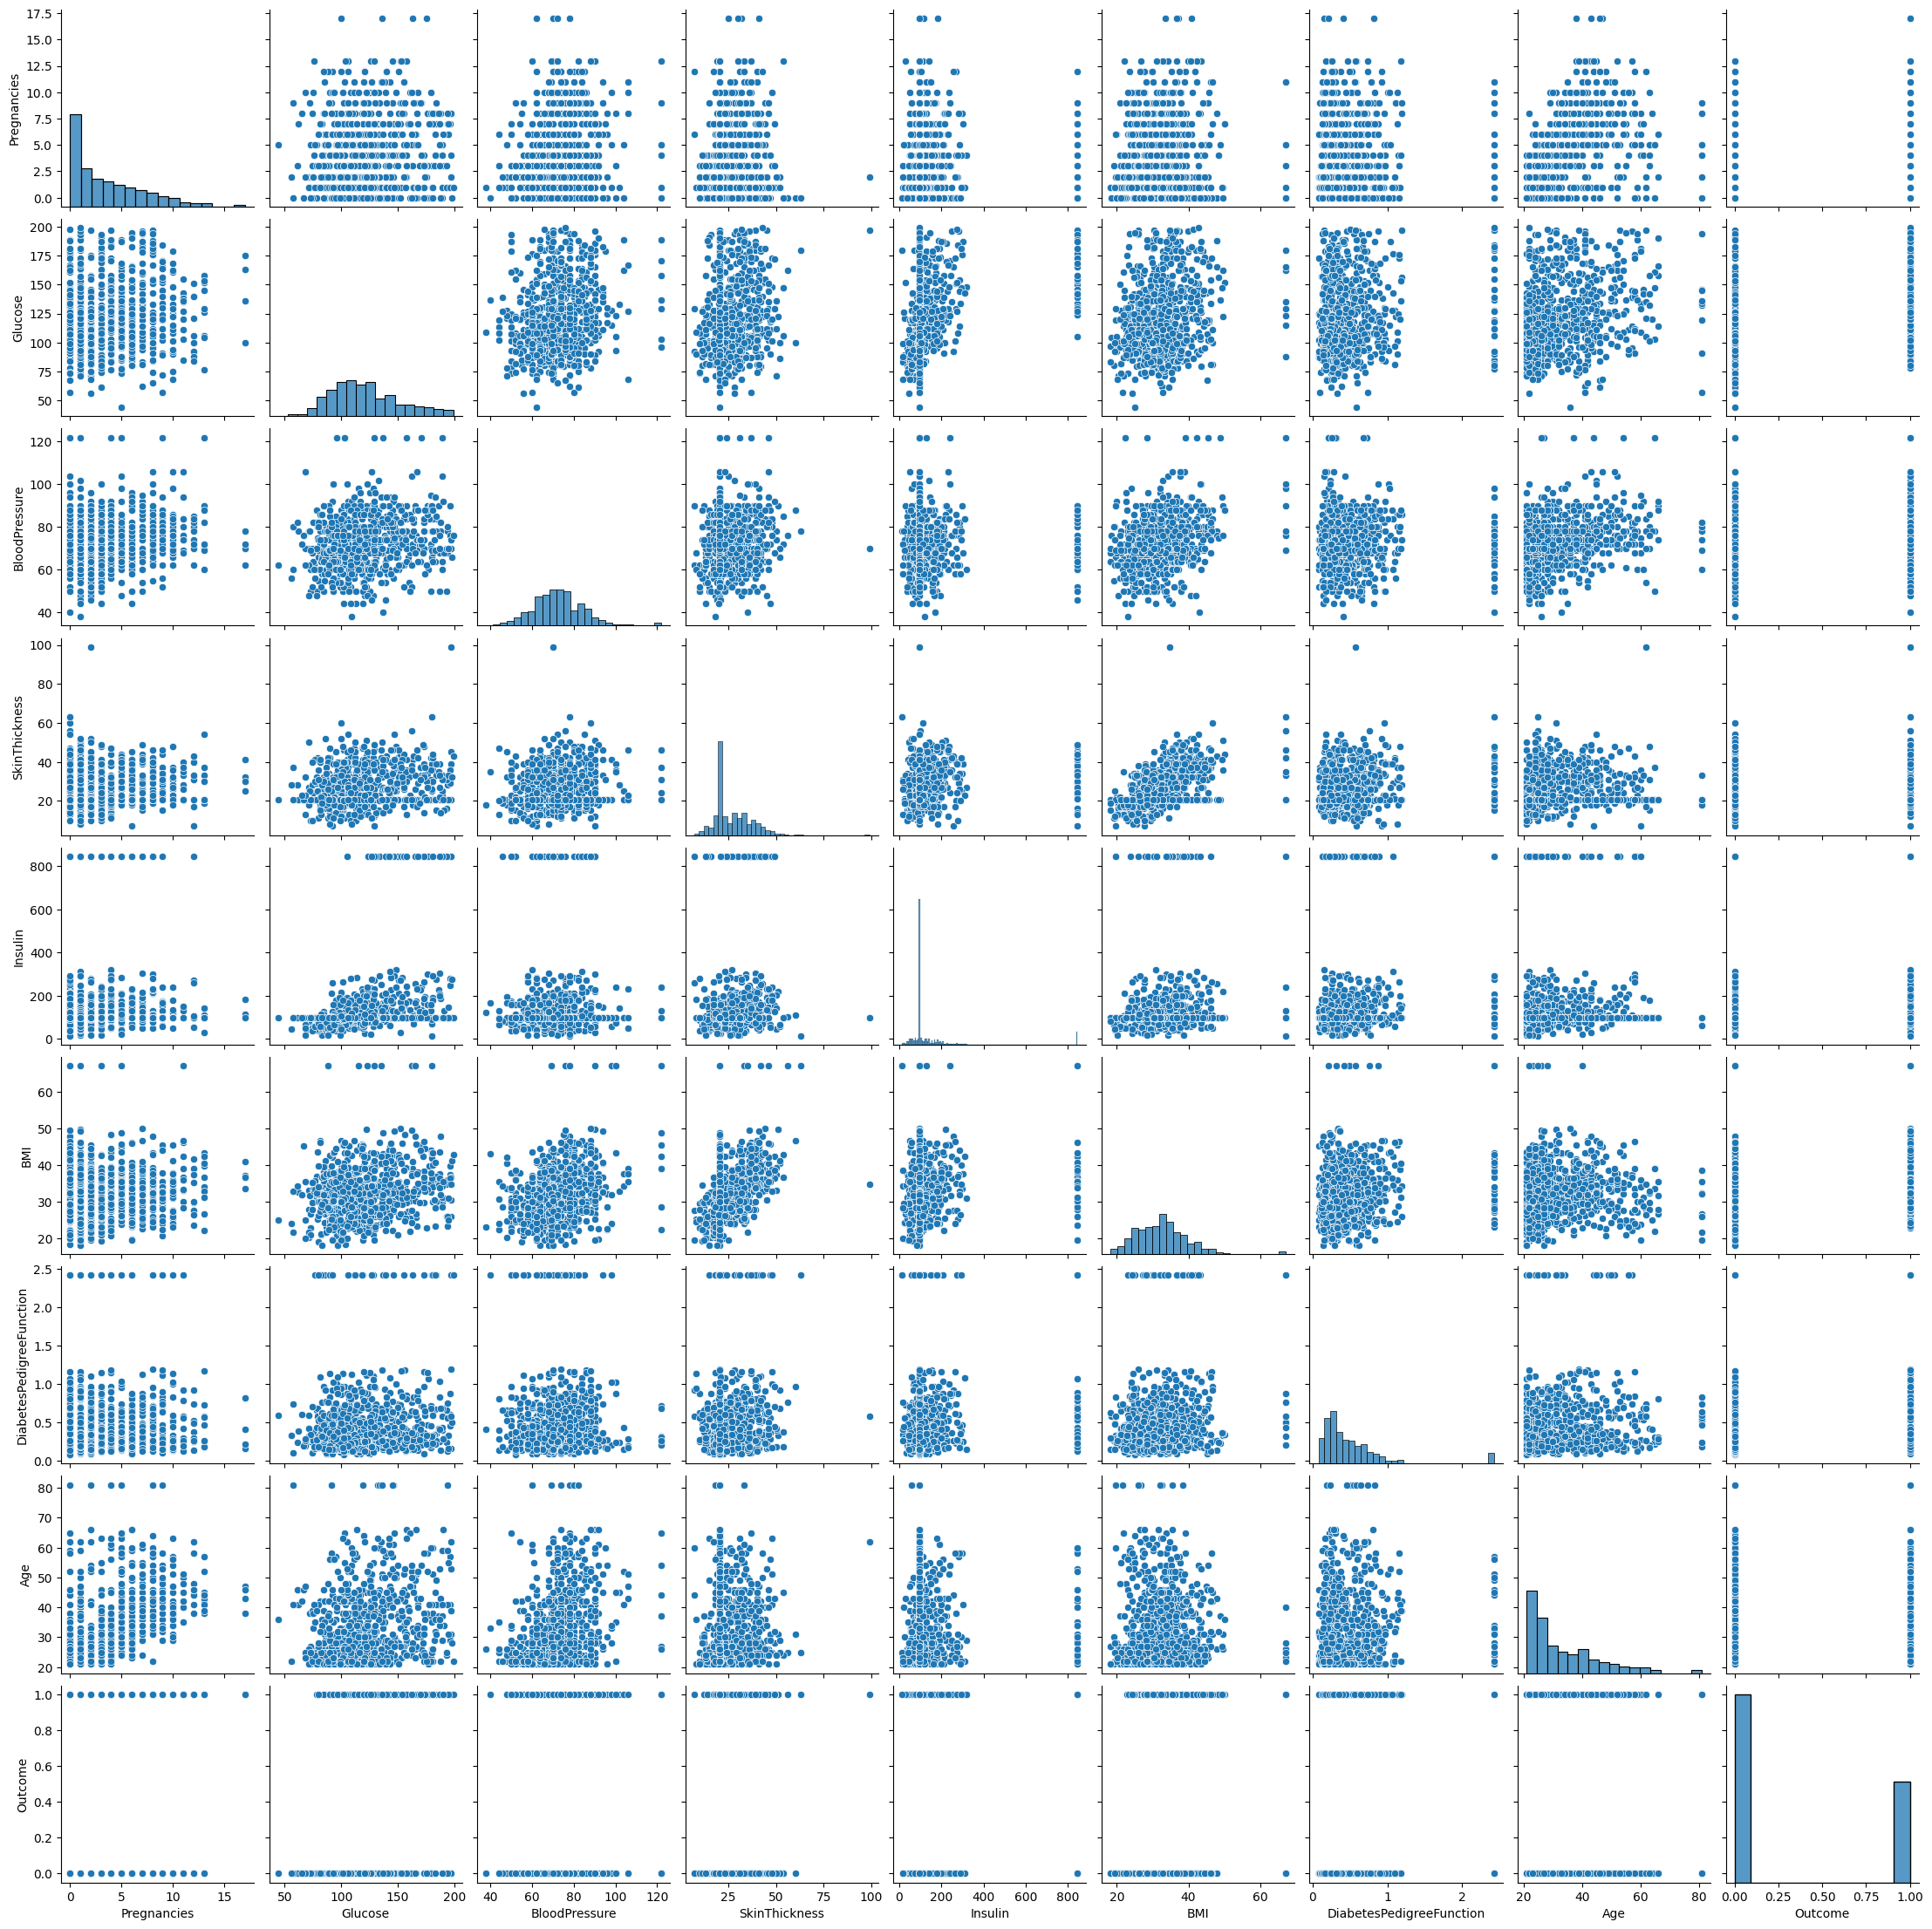

In [43]:
sns.pairplot(df)

<Axes: >

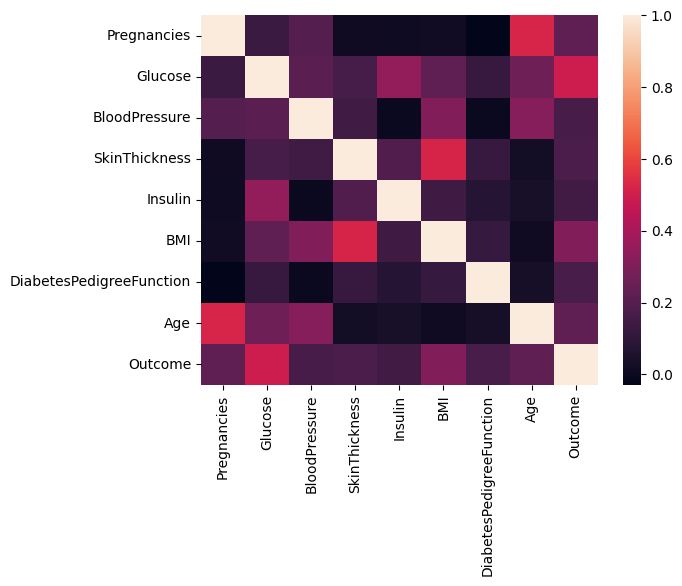

In [44]:
sns.heatmap(df.corr())

In [45]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Extract correlation values of target column with other columns
target_correlation = corr_matrix['Outcome'].drop('Outcome')

# Sort correlation values in descending order to find most correlated columns
most_correlated = target_correlation.abs().sort_values(ascending=False)
most_correlated

Glucose                     0.492908
BMI                         0.305014
Age                         0.227511
Pregnancies                 0.223716
SkinThickness               0.175026
DiabetesPedigreeFunction    0.167726
BloodPressure               0.166531
Insulin                     0.150960
Name: Outcome, dtype: float64

# So the most corelated column is Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,SkinThickness. This we will include our prediction for the outcome.

In [46]:
# Let's check for the balancing of outcome
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

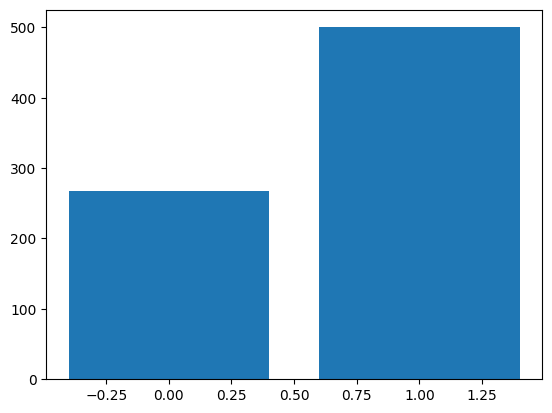

In [47]:
import matplotlib.pyplot as plt
plt.bar(df['Outcome'].unique(),df['Outcome'].value_counts())
plt.show()

# As clearly seen 0 owerpowers 1 in the given dataset.

# Feature Engineering

In [48]:
# Let us first replace outliers from their high or low values
import pandas as pd

# Function to replace outliers with min or max values, except for the 'target' column
def replace_outliers_with_min_max(df, exclude_column='Outcome'):
    df_clean = df.copy()
    for column in df_clean.columns:
        if column != exclude_column and df_clean[column].dtype in ['int64', 'float64']:  # Process only numerical columns except the excluded one
            Q1 = df_clean[column].quantile(0.25)
            Q3 = df_clean[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Replace outliers below the lower bound with the min value
            min_value = df_clean[column].min()
            df_clean.loc[df_clean[column] < lower_bound, column] = min_value

            # Replace outliers above the upper bound with the max value
            max_value = df_clean[column].max()
            df_clean.loc[df_clean[column] > upper_bound, column] = max_value

    return df_clean

# Example usage:
# Assuming df is your DataFrame
df_clean = replace_outliers_with_min_max(df, exclude_column='Outcome')
df=df_clean

# Check the result



<Axes: >

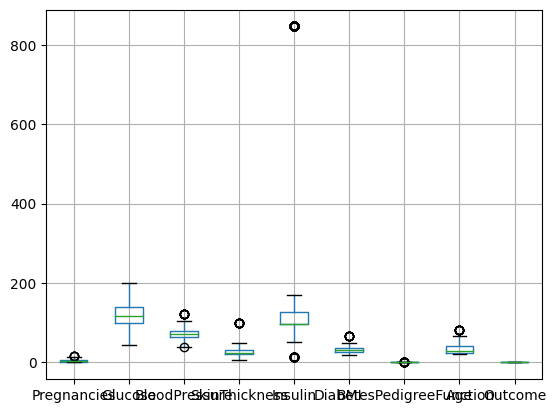

In [49]:
df.boxplot()

# Start our model work

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [51]:
X=df[['Glucose','BMI','Age','Pregnancies','DiabetesPedigreeFunction','SkinThickness']]

In [52]:
y=df['Outcome']

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [54]:
# Now let us balance our y_train so that our model is not biased
# Let us do SMOTE to do oversample
from imblearn.over_sampling import SMOTE

# Initialize SMOTE with a random state for reproducibility
sm = SMOTE(random_state=2)

# Fit and resample the training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# Check the shape of resampled data
print("Before SMOTE:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("\nAfter SMOTE:")
print("X_train_res shape:", X_train_res.shape)
print("y_train_res shape:", y_train_res.shape)


Before SMOTE:
X_train shape: (537, 6)
y_train shape: (537,)

After SMOTE:
X_train_res shape: (698, 6)
y_train_res shape: (698,)


In [55]:
y_train_res_series = pd.Series(y_train_res)

# Check the distribution of the resampled target variable
print("Distribution of resampled target variable:")
print(y_train_res_series.value_counts())

Distribution of resampled target variable:
0    349
1    349
Name: count, dtype: int64


In [56]:
# Let us standard scale our data points
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_res)
X_test_scaled=scaler.transform(X_test)

In [57]:
# Let us start trainig our logistic regression model
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [58]:
# Before that let us find the best parameters for our model by doing hyperparameter tuning

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [1, 10, 20],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'tol': [0.0001, 0.001, 0.01],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 300],
    'multi_class': ['auto', 'ovr', 'multinomial']
}



# Set up GridSearchCV
clf = GridSearchCV(logreg, param_grid=parameters, cv=5)

# Fit the model
clf.fit(X_train_scaled, y_train_res)

# Get the best parameters
print("Best parameters found: ", clf.best_params_)

# Get the best model
best_model = clf.best_estimator_


Best parameters found:  {'C': 1, 'class_weight': None, 'fit_intercept': False, 'max_iter': 200, 'multi_class': 'ovr', 'penalty': 'none', 'solver': 'saga', 'tol': 0.01}


In [59]:
log = LogisticRegression(
    C=1,
    class_weight='balanced',
    fit_intercept=False,
    max_iter=200,
    multi_class='auto',
    penalty='l1',
    solver='liblinear',
    tol=0.01
)
log.fit(X_train_scaled,y_train_res)


LogisticRegression(C=1, class_weight='balanced', fit_intercept=False,
                   max_iter=200, penalty='l1', solver='liblinear', tol=0.01)

In [60]:
# Let us predict the data points and check the accuracy of our model using y_pred
y_pred=log.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [61]:
# Let us find out the accuracy of our model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7056277056277056
[[111  40]
 [ 28  52]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       151
           1       0.57      0.65      0.60        80

    accuracy                           0.71       231
   macro avg       0.68      0.69      0.69       231
weighted avg       0.72      0.71      0.71       231



# Our model gives us only 69% of accuracy